In [36]:
import pandas as pd
import numpy as np
#import kmeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

val_data= pd.read_csv('../../data/validator_data.csv')
data= pd.read_csv('../../data/our_data.csv')
val_data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.202351          -0.021717          -0.111851   
1              0.282814          -0.016686          -0.110004   
2              0.272529          -0.020954          -0.114472   
3              0.276408          -0.024315          -0.101067   
4              0.306400          -0.013045          -0.064768   
...                 ...                ...                ...   
2055           0.275866          -0.015977          -0.107413   
2056           0.276938          -0.010382          -0.104780   
2057           0.275988          -0.010583          -0.107595   
2058           0.293323          -0.008314          -0.086588   
2059          -0.503823          -0.594207           0.264804   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.332095         -0.114114         -0.309439         -0.382582   
1            -0.994285         -0.973997         -0.988410         -0.994069   
2            -0.996784         -0.975906         -0.986597         -0.997029   
3            -0.995663         -0.973317         -0.976591         -0.996090   
4            -0.180371         -0.099780         -0.002085         -0.204581   
...                ...               ...               ...               ...   
2055         -0.995906         -0.988648         -0.980432         -0.996124   
2056         -0.995117         -0.979121         -0.968608         -0.995620   
2057         -0.995333         -0.990080         -0.976474         -0.996158   
2058         -0.985731         -0.943522         -0.934046         -0.986895   
2059         -0.703402          0.672487         -0.464985         -0.704548   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.161981         -0.308824          0.046627  ...   
1            -0.978087         -0.989570         -0.938192  ...   
2            -0.973735         -0.985556         -0.941263  ...   
3            -0.970965         -0.973102         -0.940314  ...   
4            -0.082737          0.031456         -0.095405  ...   
...                ...               ...               ...  ...   
2055         -0.989691         -0.981682         -0.937521  ...   
2056         -0.978551         -0.966391         -0.941381  ...   
2057         -0.989422         -0.975154         -0.939539  ...   
2058         -0.943477         -0.928269         -0.925988  ...   
2059          0.967664         -0.401827         -0.948813  ...   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
0                            0.068494                         0.005777   
1                           -0.076563                         0.037980   
2                            0.283428                        -0.629599   
3                            0.521509                        -0.788724   
4                            0.426281                        -0.009035   
...                               ...                              ...   
2055                         0.180432                        -0.273757   
2056                         0.450588                        -0.780039   
2057                         0.318705                        -0.012794   
2058                         0.073816                         0.145530   
2059                         0.156408                        -0.412991   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.313236                     0.831735   
1                           -0.366579                     0.072845   
2                           -0.853248                     0.144626   
3                           -0.937673                    -0.093666   
4                           -0.338551                    -0.090383   
...                               ...                          ...   
2055                        -0.641374                     0.313865   
2056      

In [37]:
corr_matrix = data.corr().abs()
high_corr = []
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i,j] > .98:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr = corr_matrix.iloc[i,j]
            high_corr.append((col1, col2, corr))
            to_drop.add(col2)


print(len(high_corr))
print(len(to_drop))

print("Columns with correlation > 0.98:")
for i in range(10):
    print(high_corr[i][0], "<->", high_corr[i][1], ":", high_corr[i][2])

data_reduced = data.drop(to_drop, axis=1)
print("whole data: " + str(data.shape))
print("reduced data: " + str(data_reduced.shape))

data=data_reduced

490
214
Columns with correlation > 0.98:
tBodyAcc-std()-X <-> tBodyAcc-mad()-X : 0.9986583826041019
tBodyAcc-std()-X <-> tBodyAcc-max()-X : 0.9813349790087165
tBodyAcc-std()-X <-> tBodyAcc-iqr()-X : 0.980538781941804
tBodyAcc-std()-X <-> fBodyAcc-mean()-X : 0.9882906005305381
tBodyAcc-std()-X <-> fBodyAcc-std()-X : 0.9985553892662831
tBodyAcc-std()-X <-> fBodyAcc-mad()-X : 0.9918135148879706
tBodyAcc-std()-Y <-> tBodyAcc-mad()-Y : 0.9975125754269467
tBodyAcc-std()-Y <-> fBodyAcc-mean()-Y : 0.9903787923200028
tBodyAcc-std()-Y <-> fBodyAcc-std()-Y : 0.9976646187981076
tBodyAcc-std()-Y <-> fBodyAcc-mad()-Y : 0.994792961527018
whole data: (8239, 561)
reduced data: (8239, 347)


In [38]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(data)
data_pca = pca.transform(data)
val_data=val_data.drop(to_drop, axis=1)
pca_val_data=pca.transform(val_data)
pca_val_data

array([[ 3.31415767,  0.50322931, -0.63128314, ...,  0.09803729,
        -0.0478087 ,  0.07537245],
       [-3.50630653, -0.16734711,  1.60620673, ..., -0.06786782,
         0.08191694, -0.08276664],
       [-3.88539611,  0.81440914, -1.31411813, ..., -0.01533292,
         0.0198266 , -0.15099462],
       ...,
       [-3.83137411,  0.9747552 , -0.88289631, ..., -0.01440293,
        -0.03070184,  0.14797544],
       [-2.15788214, -0.6898697 , -1.19498645, ...,  0.11554062,
         0.07284393, -0.06351805],
       [ 0.64401891, -4.30018128,  3.060889  , ...,  0.83439148,
         0.29720677,  0.50582645]])

In [39]:
pca_val_data.shape

(2060, 89)

In [40]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_pca)

KMeans(n_clusters=2)

In [41]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(data_pca)
from sklearn.manifold import TSNE

tSNE = TSNE(random_state=42, verbose=1)
data_tsne = tSNE.fit_transform(data_pca)
val_data_tsne = tSNE.fit_transform(pca_val_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8239 samples in 0.000s...
[t-SNE] Computed neighbors for 8239 samples in 0.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8239
[t-SNE] Computed conditional probabilities for sample 2000 / 8239
[t-SNE] Computed conditional probabilities for sample 3000 / 8239
[t-SNE] Computed conditional probabilities for sample 4000 / 8239
[t-SNE] Computed conditional probabilities for sample 5000 / 8239
[t-SNE] Computed conditional probabilities for sample 6000 / 8239
[t-SNE] Computed conditional probabilities for sample 7000 / 8239
[t-SNE] Computed conditional probabilities for sample 8000 / 8239
[t-SNE] Computed conditional probabilities for sample 8239 / 8239
[t-SNE] Mean sigma: 1.116745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.728699
[t-SNE] KL divergence after 1000 iterations: 1.675255
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2060 samples in 0.000s...
[t-SNE] Computed nei

In [42]:
labels = kmeans.predict(data_pca)
labels_6 = kmeans_6.predict(data_pca)

labels_val=kmeans.predict(pca_val_data)
labels_val_6=kmeans_6.predict(pca_val_data)

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_3654/1083686119.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))
/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_3654/1083686119.py:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))


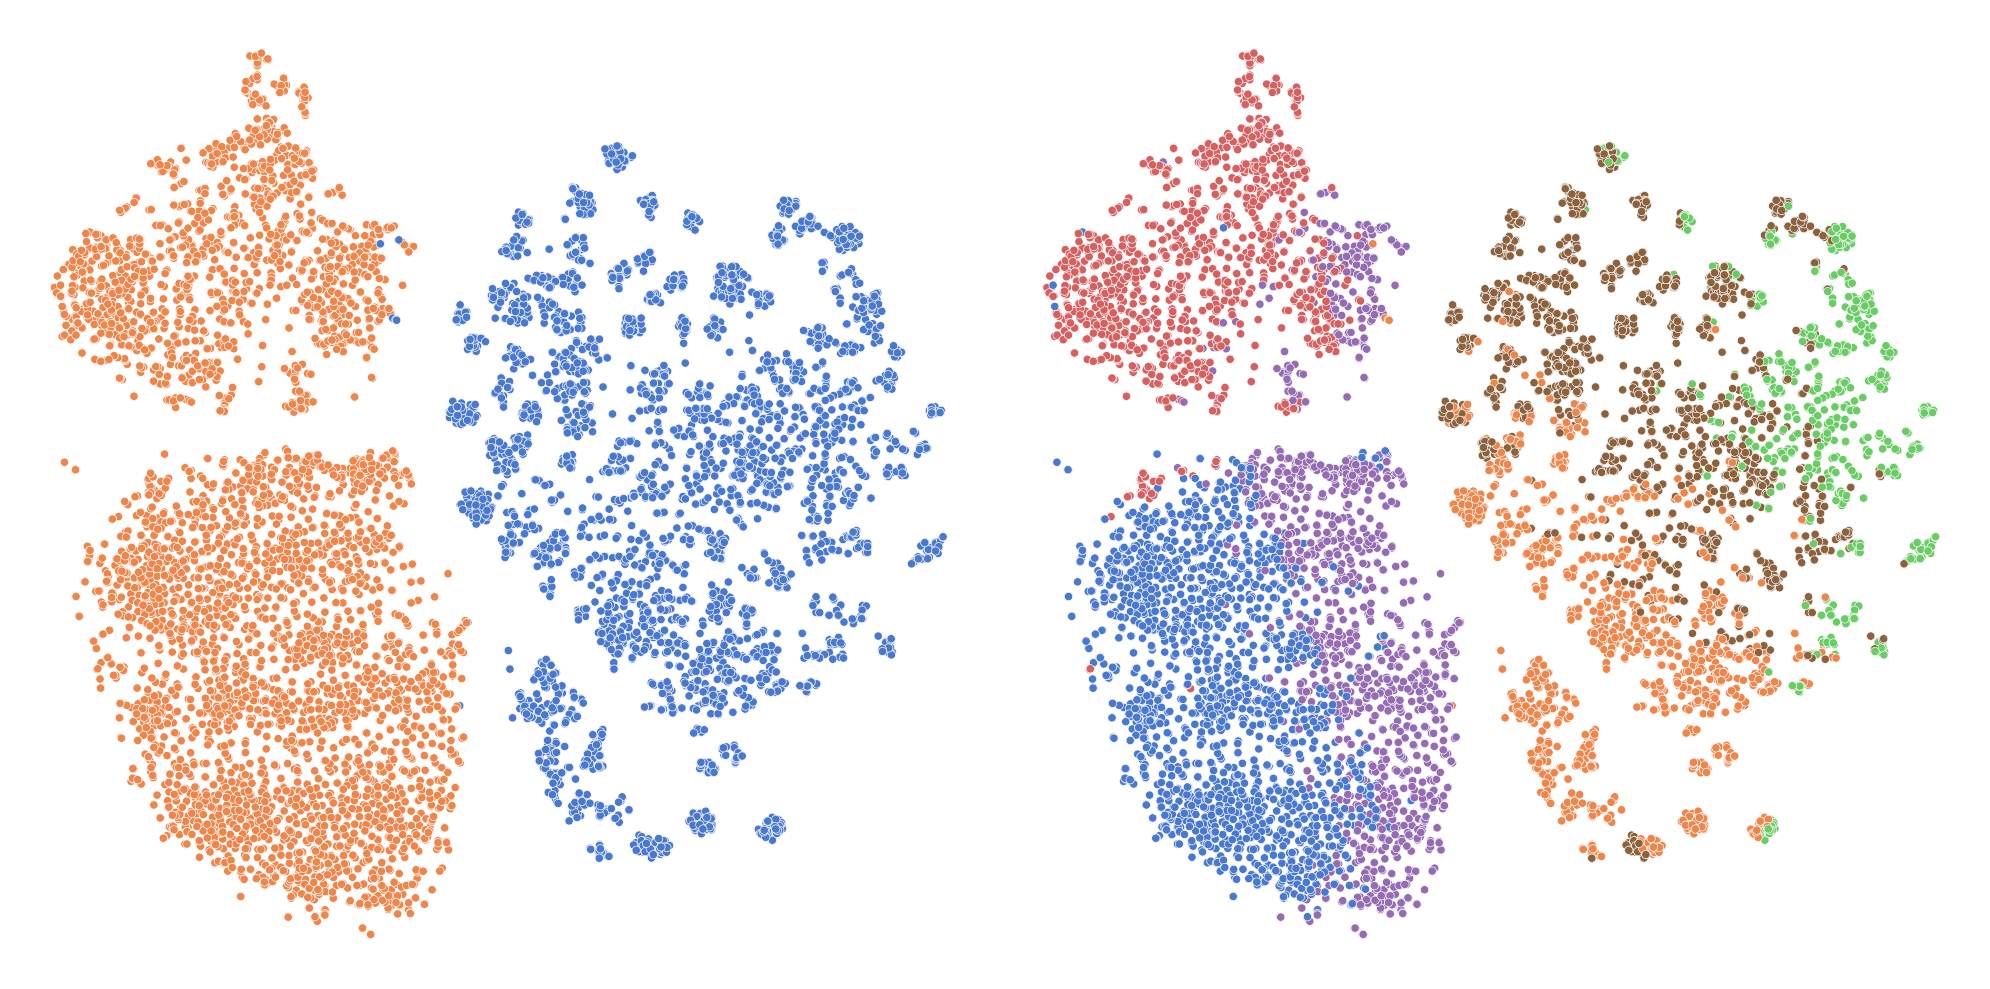

In [43]:
def compare_scatter(data, labels):
    figure, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes = axes.flatten()

    for i, label in enumerate(labels):
        sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

compare_scatter(data_tsne, [labels, labels_6])

# IMPORTANT

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_3654/1083686119.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))
/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_3654/1083686119.py:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))


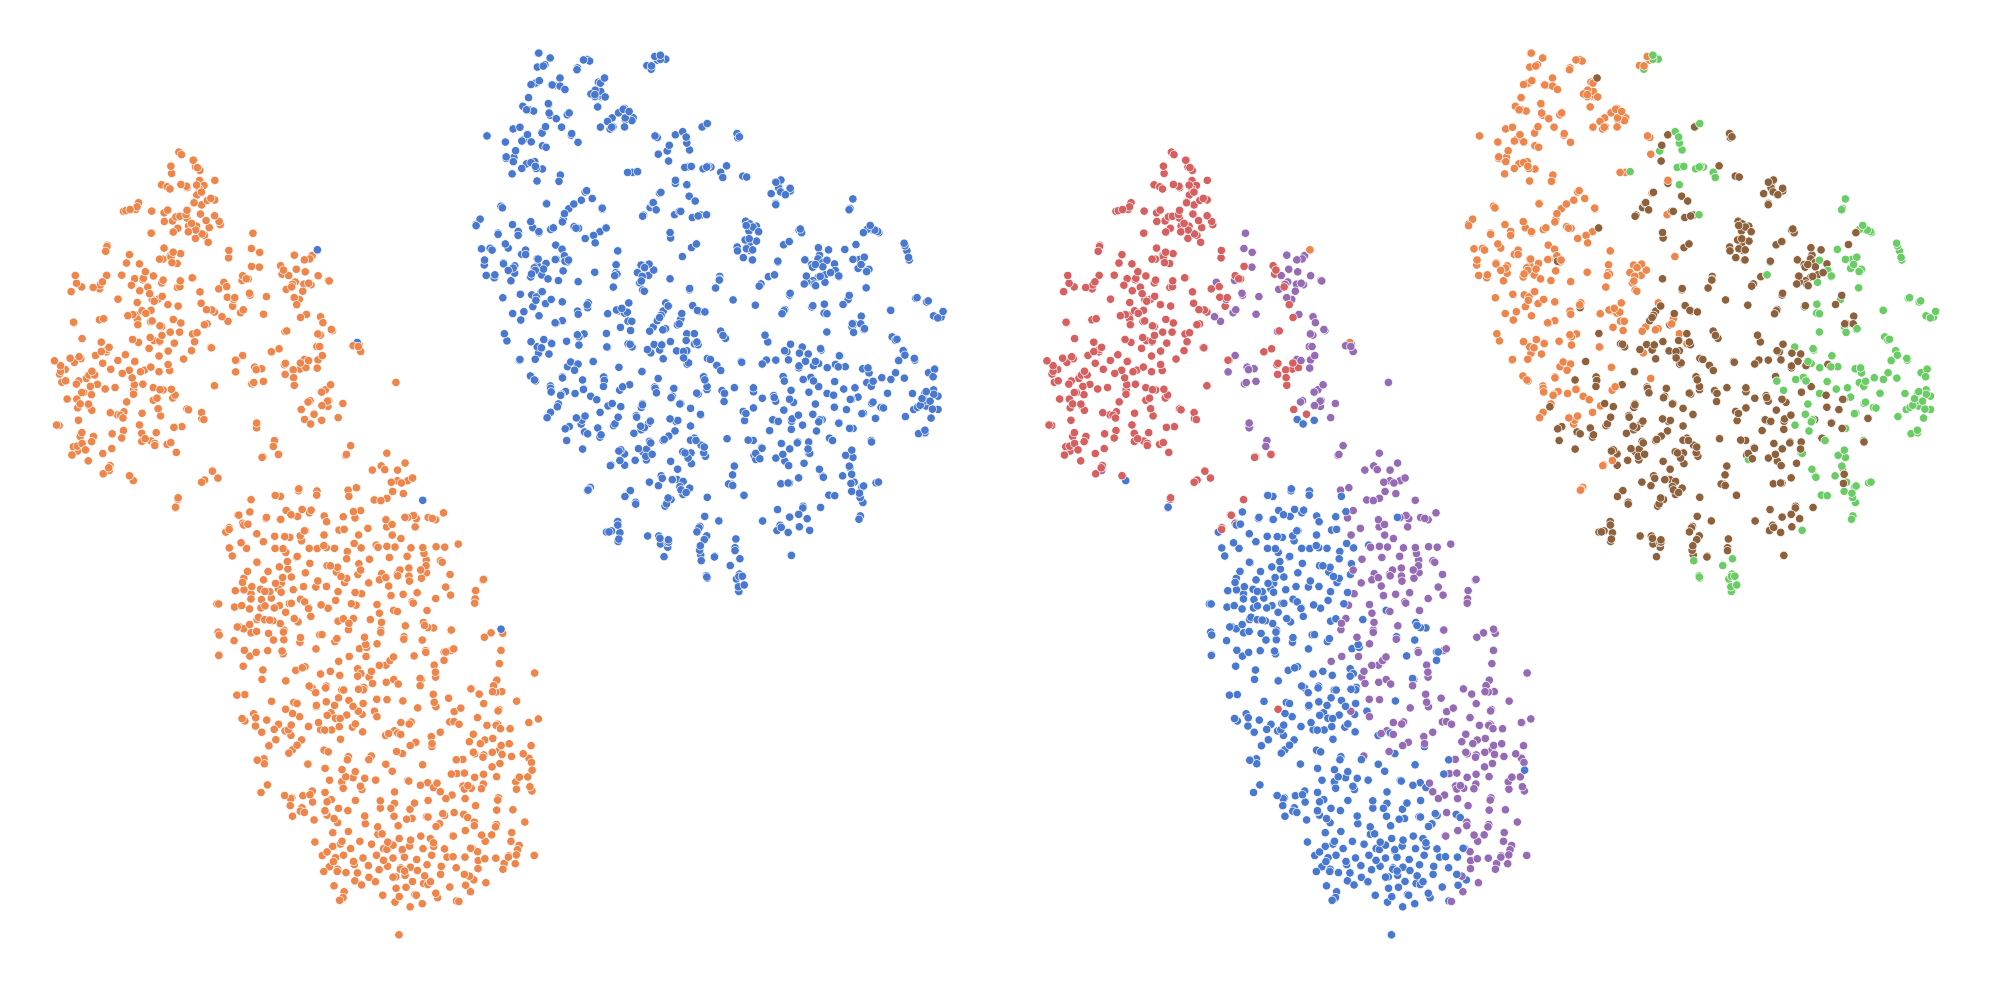

In [44]:
compare_scatter(val_data_tsne, [labels_val, labels_val_6])

# Let's look at the clusters

In [53]:
val_data['cluster2']=labels_val
val_data['cluster6']=labels_val_6

In [54]:
# mean of values in each cluster
val_data.groupby('cluster2').mean()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
cluster2                                                            
0                  0.274769          -0.019419          -0.109523   
1                  0.275782          -0.017013          -0.108275   

          tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
cluster2                                                         
0                -0.165902          0.006146         -0.219656   
1                -0.976278         -0.942925         -0.944403   

          tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  \
cluster2                                                         
0                -0.028113         -0.291452          0.161626   
1                -0.540875         -0.788799          0.825063   

          tBodyAcc-min()-Y  ...  fBodyBodyGyroJerkMag-energy()  \
cluster2                    ...                                  
0                 0.056351  ...                      -0.859814   
1                 0.668208  ...                      -0.999105   

          fBodyBodyGyroJerkMag-maxInds  fBodyBodyGyroJerkMag-meanFreq()  \
cluster2                                                                  
0                            -0.882710                         0.104553   
1                            -0.916646                         0.141955   

          fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
cluster2                                                                     
0                               -0.233547                        -0.567731   
1                               -0.357408                        -0.669549   

          angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
cluster2                                                                      
0                            0.011766                             -0.012952   
1                            0.010755                              0.002400   

          angle(tBodyGyroMean,gravityMean)  \
cluster2                                     
0                                 0.025942   
1                                 0.004179   

          angle(tBodyGyroJerkMean,gravityMean)  cluster6  
cluster2                                                  
0                                     0.005992  3.008602  
1                                    -0.002482  2.107965  

[2 rows x 348 columns]

In [55]:
val_data.groupby('cluster6').mean()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
cluster6                                                            
0                  0.277361          -0.016710          -0.109001   
1                  0.259838          -0.025802          -0.110864   
2                  0.286786          -0.018559          -0.109435   
3                  0.276809          -0.017325          -0.108366   
4                  0.274175          -0.015164          -0.108140   
5                  0.279279          -0.016617          -0.107808   

          tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
cluster6                                                         
0                -0.994048         -0.978645         -0.979008   
1                -0.305023         -0.091506         -0.229740   
2                 0.049036          0.257984         -0.033272   
3                -0.980473         -0.980074         -0.981510   
4                -0.948126         -0.854594         -0.860521   
5                -0.156048         -0.036221         -0.296998   

          tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  \
cluster6                                                         
0                -0.563007         -0.811811          0.845041   
1                -0.084372         -0.322099          0.278524   
2                 0.082491         -0.156403         -0.022457   
3                -0.563501         -0.812387          0.833942   
4                -0.485512         -0.734955          0.789817   
5                -0.037681         -0.329045          0.155030   

          tBodyAcc-min()-Y  ...  fBodyBodyGyroJerkMag-energy()  \
cluster6                    ...                                  
0                 0.684579  ...                      -0.999871   
1                 0.166209  ...                      -0.949831   
2                -0.161957  ...                      -0.665906   
3                 0.685027  ...                      -0.999789   
4                 0.629982  ...                      -0.997387   
5                 0.071545  ...                      -0.881384   

          fBodyBodyGyroJerkMag-maxInds  fBodyBodyGyroJerkMag-meanFreq()  \
cluster6                                                                  
0                            -0.898075                         0.277511   
1                            -0.876833                         0.075261   
2                            -0.889784                         0.133301   
3                            -0.888414                         0.220873   
4                            -0.968254                        -0.109947   
5                            -0.883242                         0.113462   

          fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
cluster6                                                                     
0                               -0.479038                        -0.764762   
1                               -0.343181                        -0.669379   
2                               -0.266062                        -0.608365   
3                               -0.395509                        -0.704933   
4                               -0.160773                        -0.509368   
5                               -0.136171                        -0.473100   

          angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
cluster6                                                                      
0                            0.011823                             -0.008566   
1                            0.060532                             -0.028011   
2                           -0.059240                              0.022456   
3                            0.007465                              0.027084   
4                            0.012933                             -0.006748   
5                            0.007675                             -0.018499   

          a

In [56]:
# max of values in each cluster
val_data.groupby('cluster2').max()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
cluster2                                                            
0                  1.000000           0.535820           0.264804   
1                  0.692761           0.449234           0.375539   

          tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
cluster2                                                         
0                 0.793422          0.916238          0.833666   
1                -0.297481          0.127495          0.118168   

          tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  \
cluster2                                                         
0                 0.643618          0.651143          1.000000   
1                 0.320345         -0.029399          0.856325   

          tBodyAcc-min()-Y  ...  fBodyBodyGyroJerkMag-energy()  \
cluster2                    ...                                  
0                 0.678130  ...                       1.000000   
1                 0.742211  ...                      -0.942862   

          fBodyBodyGyroJerkMag-maxInds  fBodyBodyGyroJerkMag-meanFreq()  \
cluster2                                                                  
0                            -0.206349                         0.618271   
1                             0.968254                         1.000000   

          fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
cluster2                                                                     
0                                0.896923                         0.855531   
1                                1.000000                         1.000000   

          angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
cluster2                                                                      
0                            0.960391                              0.991899   
1                            0.952074                              0.945853   

          angle(tBodyGyroMean,gravityMean)  \
cluster2                                     
0                                 0.998341   
1                                 0.960737   

          angle(tBodyGyroJerkMean,gravityMean)  cluster6  
cluster2                                                  
0                                     0.984118         5  
1                                     0.958589         4  

[2 rows x 348 columns]

In [57]:
val_data.groupby('cluster6').max()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
cluster6                                                            
0                  0.296819           0.006551          -0.038279   
1                  0.425789           0.127485           0.264804   
2                  0.578400           0.062584           0.049582   
3                  0.516840           0.008530          -0.056835   
4                  1.000000           0.535820           0.375539   
5                  0.487402           0.083608           0.043105   

          tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
cluster6                                                         
0                -0.896726         -0.835032         -0.856386   
1                 0.317377          0.672487          0.774026   
2                 0.793422          0.916238          0.833666   
3                -0.812017         -0.861392         -0.823685   
4                -0.297481          0.493446          0.118168   
5                 0.490503          0.394740          0.406729   

          tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  \
cluster6                                                         
0                -0.439642         -0.682723          0.854911   
1                 0.384149          0.431084          0.637524   
2                 0.642329          0.651143          0.344492   
3                -0.477414         -0.700704          0.856325   
4                 0.643618         -0.029399          1.000000   
5                 0.432940          0.214909          0.471332   

          tBodyAcc-min()-Y  ...  fBodyBodyGyroJerkMag-energy()  \
cluster6                    ...                                  
0                 0.699660  ...                      -0.989553   
1                 0.658164  ...                      -0.820431   
2                 0.357119  ...                       1.000000   
3                 0.698523  ...                      -0.995080   
4                 0.742211  ...                      -0.942862   
5                 0.441439  ...                      -0.571034   

          fBodyBodyGyroJerkMag-maxInds  fBodyBodyGyroJerkMag-meanFreq()  \
cluster6                                                                  
0                             0.968254                         0.776008   
1                            -0.206349                         0.529807   
2                            -0.269841                         0.564796   
3                             0.650794                         1.000000   
4                             0.174603                         0.448676   
5                            -0.523810                         0.618271   

          fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
cluster6                                                                     
0                                0.597228                         0.466480   
1                                0.615024                         0.438056   
2                                0.552021                         0.348760   
3                                1.000000                         1.000000   
4                                0.824804                         0.758511   
5                                0.896923                         0.855531   

          angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
cluster6                                                                      
0                            0.952074                              0.866087   
1                            0.960391                              0.908551   
2                            0.934882                              0.991899   
3                            0.757810                              0.945853   
4                            0.501495                              0.915567   
5                            0.957756                              0.990995   

          a

In [58]:
# min of values in each cluster
val_data.groupby('cluster2').min()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
cluster2                                                            
0                 -0.503823          -0.594207          -0.757526   
1                 -0.592004          -1.000000          -0.925988   

          tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
cluster2                                                         
0                -0.934471         -0.586537         -0.667021   
1                -1.000000         -1.000000         -0.998625   

          tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  \
cluster2                                                         
0                -0.511096         -0.916807         -0.874404   
1                -1.000000         -0.983578         -0.281578   

          tBodyAcc-min()-Y  ...  fBodyBodyGyroJerkMag-energy()  \
cluster2                    ...                                  
0                -0.906038  ...                      -0.999134   
1                -0.191547  ...                      -1.000000   

          fBodyBodyGyroJerkMag-maxInds  fBodyBodyGyroJerkMag-meanFreq()  \
cluster2                                                                  
0                                 -1.0                        -0.465171   
1                                 -1.0                        -0.773138   

          fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
cluster2                                                                     
0                               -0.850064                        -0.983024   
1                               -0.944282                        -0.999595   

          angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
cluster2                                                                      
0                           -0.968920                             -0.993402   
1                           -0.945955                             -0.917921   

          angle(tBodyGyroMean,gravityMean)  \
cluster2                                     
0                                -0.999218   
1                                -0.967862   

          angle(tBodyGyroJerkMean,gravityMean)  cluster6  
cluster2                                                  
0                                    -0.975424         1  
1                                    -1.000000         0  

[2 rows x 348 columns]

In [59]:
val_data.groupby('cluster6').min()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
cluster6                                                            
0                  0.245125          -0.048333          -0.167537   
1                 -0.503823          -0.594207          -0.391456   
2                  0.028502          -0.096271          -0.271555   
3                  0.192778          -0.055234          -0.135541   
4                 -0.592004          -1.000000          -0.925988   
5                  0.114594          -0.193053          -0.236926   

          tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
cluster6                                                         
0                -1.000000         -0.999844         -0.998222   
1                -0.810183         -0.450475         -0.654948   
2                -0.407600         -0.316308         -0.563030   
3                -0.997613         -1.000000         -0.998625   
4                -0.997007         -0.985822         -0.990722   
5                -0.553660         -0.439957         -0.660049   

          tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  \
cluster6                                                         
0                -0.581937         -0.846114          0.592405   
1                -0.511096         -0.632944         -0.435073   
2                -0.260911         -0.518330         -0.874404   
3                -0.580951         -0.830000          0.516125   
4                -1.000000         -0.983578         -0.281578   
5                -0.307181         -0.607760         -0.380342   

          tBodyAcc-min()-Y  ...  fBodyBodyGyroJerkMag-energy()  \
cluster6                    ...                                  
0                 0.529078  ...                      -0.999999   
1                -0.244711  ...                      -0.998654   
2                -0.906038  ...                      -0.931190   
3                 0.579858  ...                      -1.000000   
4                -0.191547  ...                      -0.999998   
5                -0.480443  ...                      -0.981043   

          fBodyBodyGyroJerkMag-maxInds  fBodyBodyGyroJerkMag-meanFreq()  \
cluster6                                                                  
0                                 -1.0                        -0.553884   
1                                 -1.0                        -0.465171   
2                                 -1.0                        -0.321302   
3                                 -1.0                        -0.646337   
4                                 -1.0                        -0.773138   
5                                 -1.0                        -0.324733   

          fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
cluster6                                                                     
0                               -0.944282                        -0.999595   
1                               -0.850064                        -0.983024   
2                               -0.799228                        -0.960267   
3                               -0.925958                        -0.984361   
4                               -0.804299                        -0.986475   
5                               -0.783383                        -0.964161   

          angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
cluster6                                                                      
0                           -0.719331                             -0.854385   
1                           -0.849958                             -0.981799   
2                           -0.968920                             -0.971715   
3                           -0.945955                             -0.917921   
4                           -0.585854                             -0.780428   
5                           -0.934028                             -0.993402   

          a

# Quick checks

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_3654/1083686119.py:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))
/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_3654/1083686119.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))


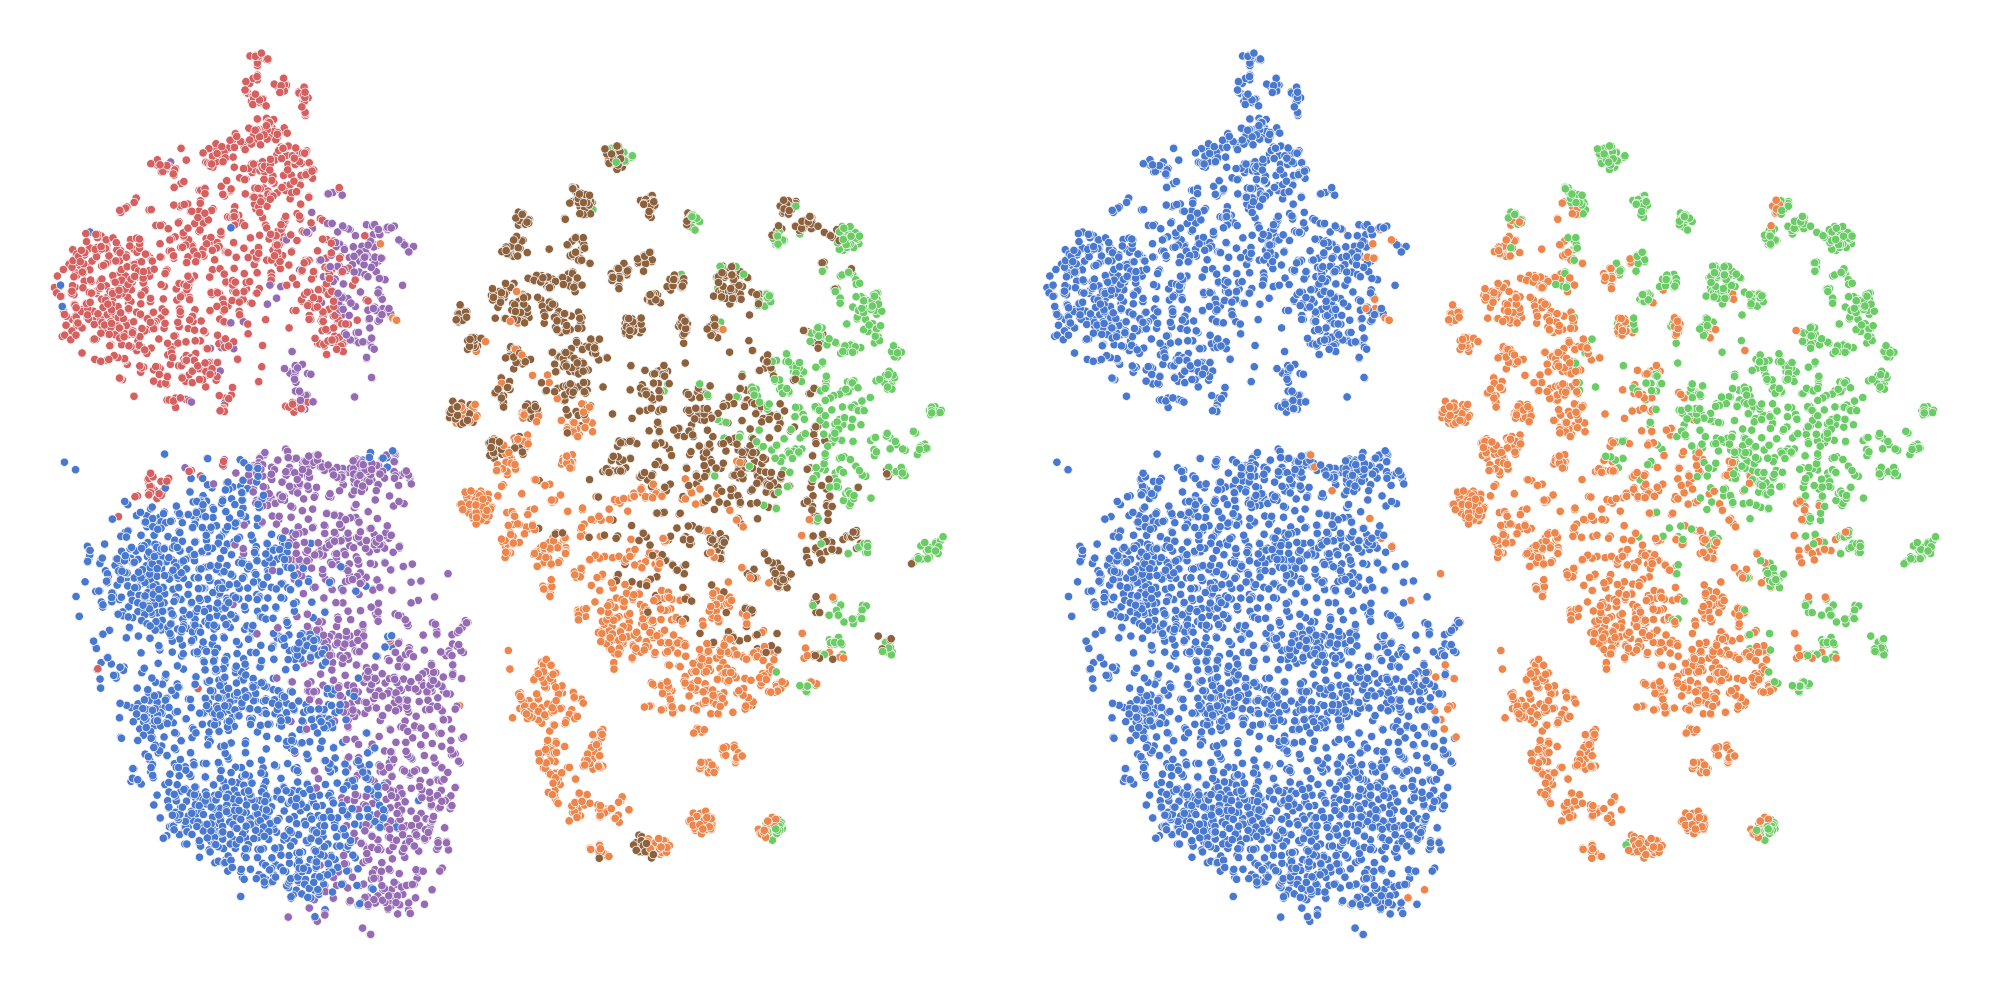

In [51]:
#
kmeans_3=KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(data_pca)
labels_3=kmeans_3.predict(data_pca)

compare_scatter(data_tsne, [labels_6, labels_3])

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_3654/1083686119.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))
/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_3654/1083686119.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))


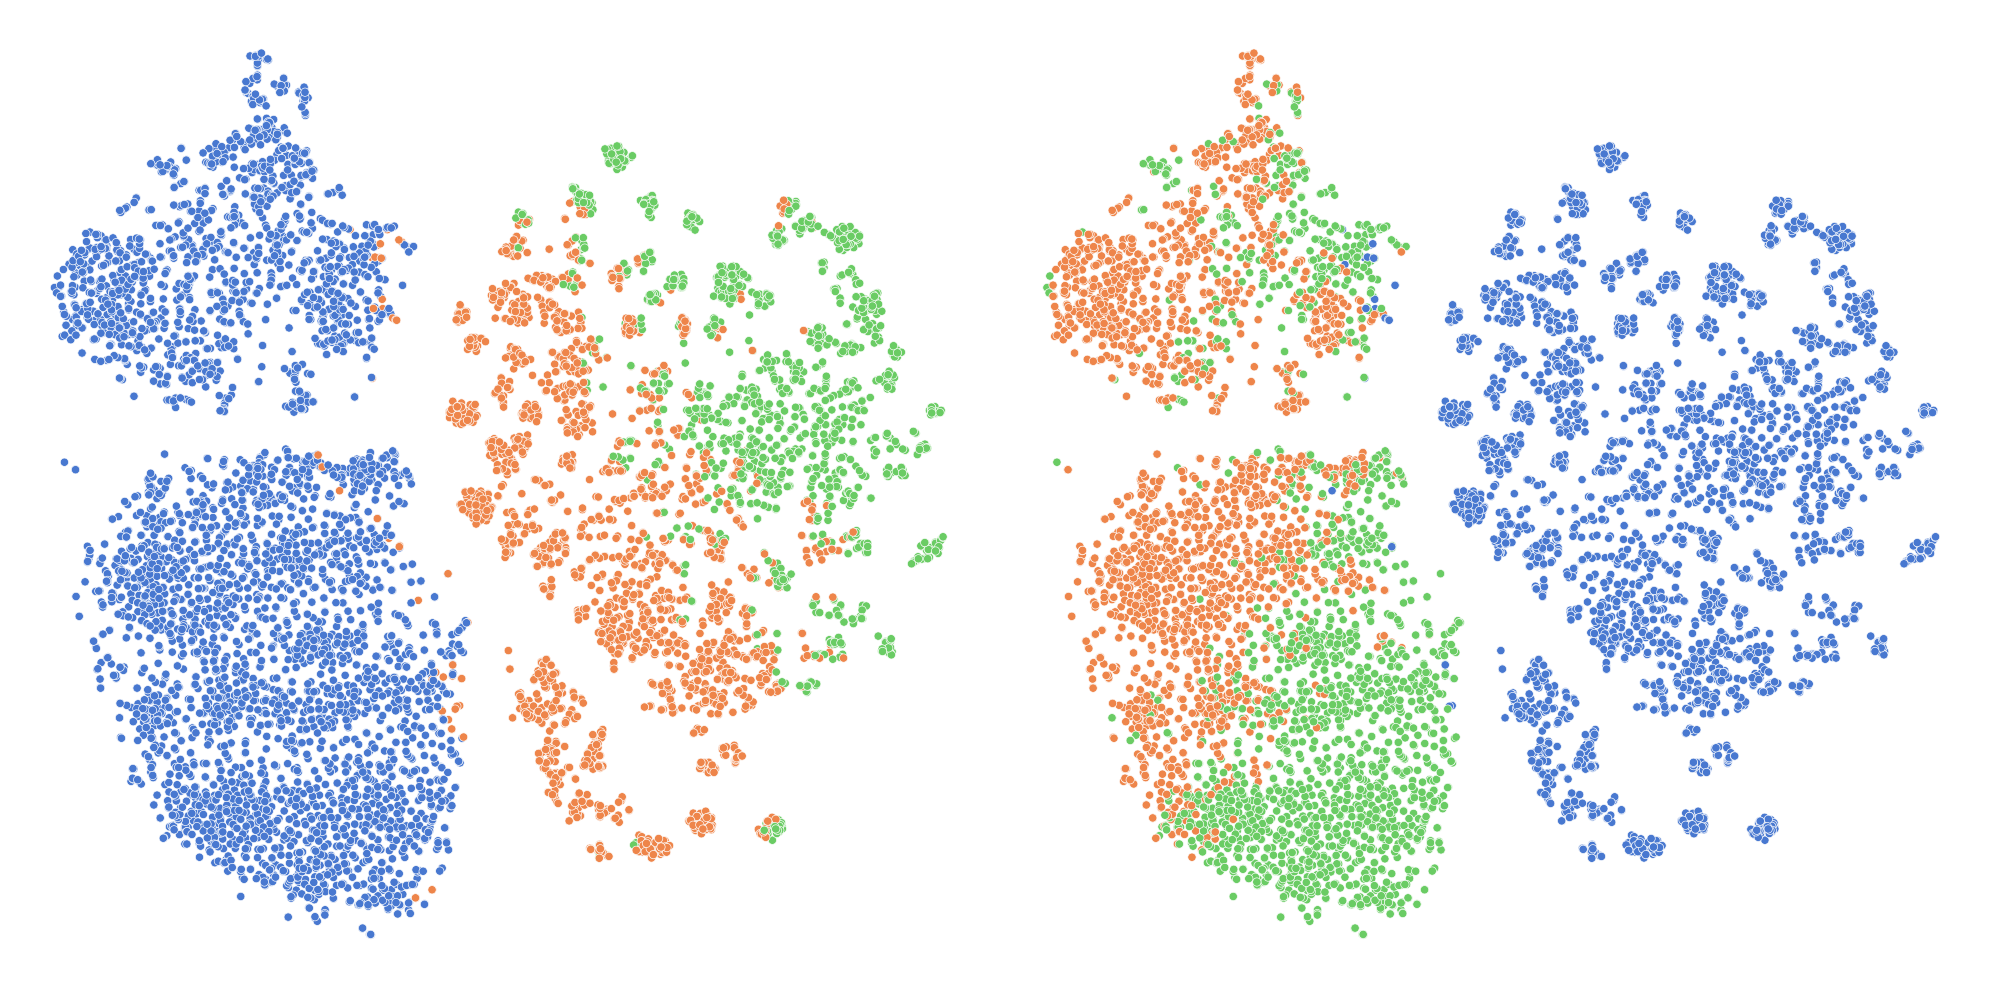

In [52]:
#Kmedoids
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=42)

kmedoids.fit(data_pca)

labels_kmedoids = kmedoids.predict(data_pca)

compare_scatter(data_tsne, [labels_3, labels_kmedoids])

hmm